In [1]:
##importing necessary libraries for computation and analysis
import xarray as xr
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4 as nc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import time



In [ ]:
##storing dataset in a variable
dataset = xr.open_dataset("/home/matin/project/subset.nc")
ds = xr.open_dataset("/home/matin/project/sst.day.mean.2021.nc")


ds_40=dataset.sel(time=~((dataset.time.dt.month == 2) & (dataset.time.dt.day == 29)))



percentile=xr.open_dataset("/home/matin/project/Percentile.nc")
percentile90=percentile.rename({'__xarray_dataarray_variable__' :'percentile90'}).percentile90
Avg=xr.open_dataset("/home/matin/project/Average40.nc")
Avg40=Avg.rename({'__xarray_dataarray_variable__' :'Avg40'}).Avg40


In [2]:
SST=pd.DataFrame(ds_40.sst[14002:14367].sel(lon=slice(89,94),lat=slice(14,19)).astype(np.float32).mean(dim=['lat','lon']).data,index=pd.date_range("2020-01-01", periods=365),columns=['SST'])
NiNtypercentile=pd.DataFrame(percentile90.astype(np.float32).mean(dim=['lat','lon']).data,index=pd.date_range("2020-01-01", periods=365),columns=['90percentile'])
Average=pd.DataFrame(Avg40.astype(np.float32).mean(dim=['lat','lon']).data,index=pd.date_range("2020-01-01", periods=365),columns=['Avg40'])

df=pd.concat([SST,NiNtypercentile,Average],axis=1)
df

,SST,90percentile,Avg40
2020-01-01,26.483526,28.136526,27.408953
2020-01-02,26.319326,28.138929,27.387529
2020-01-03,26.230049,28.132801,27.375721
2020-01-04,26.218847,28.118912,27.371059
2020-01-05,26.237276,28.098236,27.369238
...,...,...,...
2020-12-26,27.487600,28.253448,27.559172
2020-12-27,27.438301,28.218182,27.529364
2020-12-28,27.363823,28.183237,27.497898
2020-12-29,27.270750,28.163088,27.471861


<AxesSubplot:>

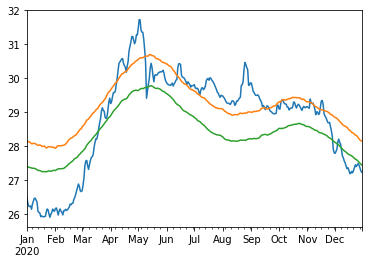

In [3]:
df['SST'].plot()
df['90percentile'].plot()
df['Avg40'].plot()

In [4]:
##Calculating rolling mean for 11 day window to smoothen the curve
rolling_mean=percentile90.rolling(time=11).mean()
rolling_avg=Avg40.rolling(time=11).mean()
SST=pd.DataFrame(ds_40.sst[14002:14367].sel(lon=slice(89,94),lat=slice(14,19)).astype(np.float32).mean(dim=['lat','lon']).data,index=pd.date_range("2020-01-01", periods=365),columns=['SST'])
NiNtypercentile=pd.DataFrame(rolling_mean.astype(np.float32).mean(dim=['lat','lon']).data,index=pd.date_range("2020-01-01", periods=365),columns=['90percentile'])
Average=pd.DataFrame(rolling_avg.astype(np.float32).mean(dim=['lat','lon']).data,index=pd.date_range("2020-01-01", periods=365),columns=['Avg40'])

df=pd.concat([SST,NiNtypercentile,Average],axis=1)
df

,SST,90percentile,Avg40
2020-01-01,26.483526,NaN,NaN
2020-01-02,26.319326,NaN,NaN
2020-01-03,26.230049,NaN,NaN
2020-01-04,26.218847,NaN,NaN
2020-01-05,26.237276,NaN,NaN
...,...,...,...
2020-12-26,27.487600,28.373867,27.666073
2020-12-27,27.438301,28.349880,27.645411
2020-12-28,27.363823,28.324213,27.622822
2020-12-29,27.270750,28.298931,27.599171


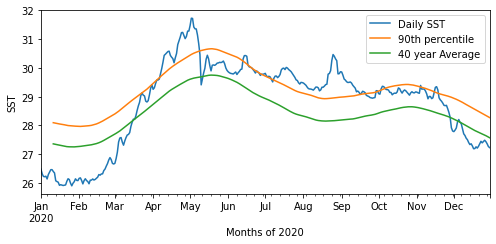

In [33]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
df['SST'].plot( label ='Daily SST')
df['90percentile'].plot( label ='90th percentile')
df['Avg40'].plot( label = '40 year Average')
plt.ylabel("SST")
plt.xlabel("Months of 2020")
plt.legend()

In [22]:
df.index[1]

Timestamp('2020-01-02 00:00:00', freq='D')

In [26]:
c=(df['SST'][85:135]-df['90percentile'][85:135])
c.where(c>0,0).sum()

20.659517

In [16]:
df['90percentile'][85:135].mean()

30.063880920410156

<AxesSubplot:>

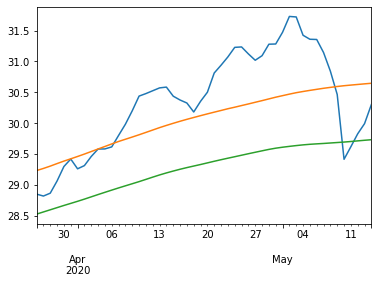

In [34]:
df['SST'][85:135].plot()
df['90percentile'][85:135].plot()
df['Avg40'][85:135].plot()